## 02686 Exam Report

## 1.1 Prey predator

In [1]:
# Prey predator function valuation
def PreyPredator(t, x, a, b):
    x1, x2 = x
    dx1= a * (1 - x2) * x1
    dx2 = -b * (1 - x1) * x2
    return [dx1,dx2]

# Jacobian of prey predator valuation
def PreyPredator_Jac(t, x, a, b):
    x1, x2 = x
    dx1x1 = a * (1 - x2) 
    dx1x2 = -a * x1
    dx2x1 = b * x2
    dx2x2 = -b * (1 - x1)
    x2_ = -b * (1 - x[0]) * x[1]
    return [[dx1x1, dx1x2], [dx2x1, dx2x2]]

# Prey predator function and jacobian
def PreyPredator_Fun_Jac(t, x, a, b):
    x1, x2 = x

    dx1= a * (1 - x2) * x1
    dx2 = -b * (1 - x1) * x2

    dx1x1 = a * (1 - x2) 
    dx1x2 = -a * x1
    dx2x1 = b * x2
    dx2x2 = -b * (1 - x1)
    return [dx1,dx2], [[dx1x1, dx1x2], [dx2x1, dx2x2]]

## 1.2 Van der Pol

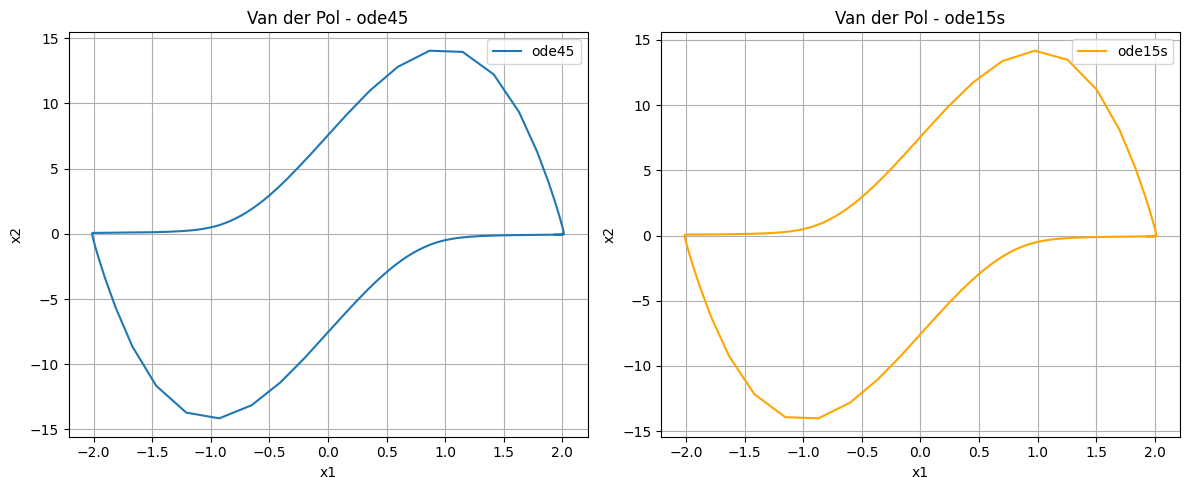

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def VanDerPol(t,x,mu):

    x1_ = x[1]

    x2_ = mu*(1-x[0]**2)*x[1]-x[0]

    return [x1_,x2_]

def VanDerPol_Jac(t, x, mu):
    x1, x2 = x
    return [
        [0, 1],
        [-2 * mu * x1 * x2 - 1, mu * (1 - x1**2)]
    ]

mu = 10
x0 = [2.0, 0.0]
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)  

sol_ode45 = solve_ivp(VanDerPol, t_span, x0, args=(mu,), t_eval=t_eval, method='RK45')

sol_ode15s = solve_ivp(VanDerPol, t_span, x0, args=(mu,), t_eval=t_eval, method='BDF',jac = VanDerPol_Jac)


"""
plt.plot(solution.t, solution.y[0], label='x1 (Position)')
plt.plot(solution.t, solution.y[1], label='x2 (Velocity)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Van der Pol Oscillator')
plt.grid()
plt.show()

plt.figure()
plt.plot(solution.y[0], solution.y[1], label='Ode45')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Van der Pol Oscillator - Time Evolution')
plt.grid()
plt.show()
"""
fig, axs = plt.subplots(1, 2, figsize=(12, 5))


# Plot RK45 (ode45)
axs[0].plot(sol_ode45.y[0], sol_ode45.y[1], label='ode45')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].set_title('Van der Pol - ode45')
axs[0].legend()
axs[0].grid()

# Plot BDF (ode15s)
axs[1].plot(sol_ode15s.y[0], sol_ode15s.y[1], label='ode15s', color='orange')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].set_title('Van der Pol - ode15s')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


## 1.3 Chemical Reaction in a Continuous Stirred Tank Reactor (CSTR)

In [ ]:
import numpy as np

CSTR 3 state

In [ ]:
def CSTR(t, C, C0):
    # Given constants 
    deltaHr = -560              # kJ/mol
    rho = 1.0                   # kg/L
    cp = 4.186                  # kJ/(kg*K)
    E_adv_R = 8500              # E_a div med E
    k0 = np.exp(24.6)           # L/(mol*s)
    A = 0.1                     # m^2
    V = 0.105                   # L (according to a Wahlgreen (2020))
    
    CA, CB, T = C
    # Calculating constants
    k = k0 * np.exp(-E_adv_R/T)
    beta = - deltaHr/(rho*cp)
    v = np.array([-1, -2, beta])
    F = v * A
    r=k*CA*CB
    
    # Reaction rate
    R = v.T*r #v transposed
    
    # Calculating the change in concentration
    system = (C0-C) * F/V + R
    dCA, dCB, dCT = system

    return [dCA, dCB, dCT]

def CSTR_Jac(t, C, C0):
    # Given constants 
    deltaHr = -560              # kJ/mol
    rho = 1.0                   # kg/L
    cp = 4.186                  # kJ/(kg*K)
    E_adv_R = 8500              # E_a div med E
    k0 = np.exp(24.6)           # L/(mol*s)
    A = 0.1                     # m^2
    V = 0.105                   # L (according to a Wahlgreen (2020))
    
    CA, CB, T = C
    # Calculating constants
    k = k0 * np.exp(-E_adv_R/T)
    beta = - deltaHr/(rho*cp)
    v = np.array([-1, -2, beta])
    F = v * A
    r=k*CA*CB
    exp_term = np.exp(E_adv_R / T)
    denom = exp_term * T**2

    Jac = np.array([
        [-F/V - k*CB,          -k*CA,         -CA*CB*k0*E_adv_R / denom],
        [-2*k*CB,              -F/V - 2*k*CA, -2*CA*CB*k0*E_adv_R / denom],
        [beta*k*CB,            beta*k*CA,     -F/V + beta*CA*CB*k0*E_adv_R / denom]
    ], dtype=float)
    return Jac

def CSTR_Fun_Jac(t, C, C0):
    # Given constants 
    deltaHr = -560              # kJ/mol
    rho = 1.0                   # kg/L
    cp = 4.186                  # kJ/(kg*K)
    E_adv_R = 8500              # E_a div med E
    k0 = np.exp(24.6)           # L/(mol*s)
    A = 0.1                     # m^2
    V = 0.105                   # L (according to a Wahlgreen (2020))
    
    CA, CB, T = C
    # Calculating constants
    k = k0 * np.exp(-E_adv_R/T) # Reformulate to avoid overflow in exp
    beta = - deltaHr/(rho*cp)
    v = np.array([-1, -2, beta])
    F = v * A
    r=k*CA*CB
    R = v.T*r #v transposed
    
    system = (C0-C) * F/V + R
    #dCA, dCB, dCT = system

    Jac= [
        [-F/V-k*CB, -k*CA, -CA*CB*k0*E_adv_R/(np.exp(E_adv_R/T)*T**2)],
        [-2*k*CB, -F/V-2*k*CA, -2*CA*CB*k0*E_adv_R/(np.exp(E_adv_R/T)*T**2)],
        [beta*k*CB, beta*k*CA, -F/V+beta*CA*CB*k0*E_adv_R/(np.exp(E_adv_R/T)*T**2)]
    ]
    return system, Jac

    
#print(CSTR(1,np.array([1,1,1]),np.array([2,2,2])))
#print(CSTR_Jac(1,np.array([1,1,1]),np.array([2,2,2])))




C0 = [1.6/2, 2.4/2, 273.65] # Wahlgreen et al. (2020)
C = [1.6/2, 2.4/2, 273.65] 
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)  

print(CSTR_Fun_Jac(1,C0,C))

sol_ode45 = solve_ivp(CSTR, t_span, C0, args=(C,), t_eval=t_eval, method='RK45')

sol_ode15s = solve_ivp(CSTR, t_span, C0, args=(C,), t_eval=t_eval, method='BDF',jac = CSTR_Jac)


# Plot RK45 (ode45)
axs[0].plot(sol_ode45.y[0], sol_ode45.y[1], label='ode45')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].set_title('Van der Pol - ode45')
axs[0].legend()
axs[0].grid()


# Plot BDF (ode15s)
axs[1].plot(sol_ode15s.y[0], sol_ode15s.y[1], label='ode15s', color='orange')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].set_title('Van der Pol - ode15s')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

CSTR 1-state